# Dependency of GDP and Life Expectancy

### Libraries import and data loading

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels

In [3]:
df = pd.read_csv("all_data.csv")

#### **Basic exploration of dataframe**
___

In [4]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


From info about table we can see that df doesn´t have any null value and we can also see 
that all columns have sensible type of values. I decided to change Life expectancy rename to more sensible name and change sizes of column names.



In [6]:
df.columns = df.columns.str.lower()
df.rename(columns={"life expectancy at birth (years)":"life_ex_years","gdp":"gdp_b_dollars"},inplace = True)
df.gdp_b_dollars = df.gdp_b_dollars/1000000000


In [7]:
df.describe()

,year,life_ex_years,gdp_b_dollars
count,96.000000,96.000000,96.000000
mean,2007.500000,72.789583,3880.498571
std,4.633971,10.672882,5197.561311
min,2000.000000,44.300000,4.415703
25%,2003.750000,74.475000,173.301750
50%,2007.500000,76.750000,1280.220000
75%,2011.250000,78.900000,4067.510000
max,2015.000000,81.000000,18100.000000


I created basic describe of the data to see ranges of life expectancy and gdps, their means, medians to get some sense from the data.

##### GDP and Life expectancy in our sample of countries.

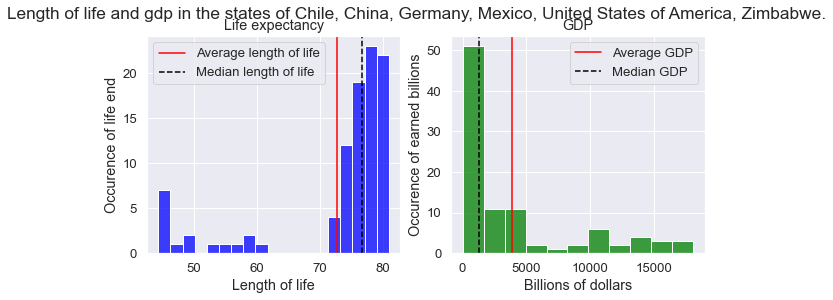

In [13]:
f = plt.figure(figsize = (10,4))
sns.set(font_scale = 1.2)
plt.subplot(1,2,1)
countries = df.country.unique()
countries_title = ", ".join(list(countries))
f.suptitle(f"Length of life and gdp in the states of {countries_title}.")

ax = sns.histplot(df.life_ex_years, color = "blue")
plt.axvline(df.life_ex_years.mean(),color="red",linestyle="-",label="Average length of life")
plt.axvline(df.life_ex_years.median(),color="black",linestyle="--",label="Median length of life")
ax.set_title("Life expectancy")
ax.set_xlabel("Length of life")
ax.set_ylabel("Occurence of life end")
plt.legend()

plt.subplot(1,2,2)
ax2 = sns.histplot(df.gdp_b_dollars,color="green")
plt.axvline(df.gdp_b_dollars.mean(),color="red",linestyle="-",label="Average GDP")
plt.axvline(df.gdp_b_dollars.median(),color="black",linestyle="--",label="Median GDP")
ax2.set_title("GDP")
ax2.set_xlabel("Billions of dollars")
ax2.set_ylabel("Occurence of earned billions")
plt.legend()


plt.show()

**GDP and LFE in individual countries:**

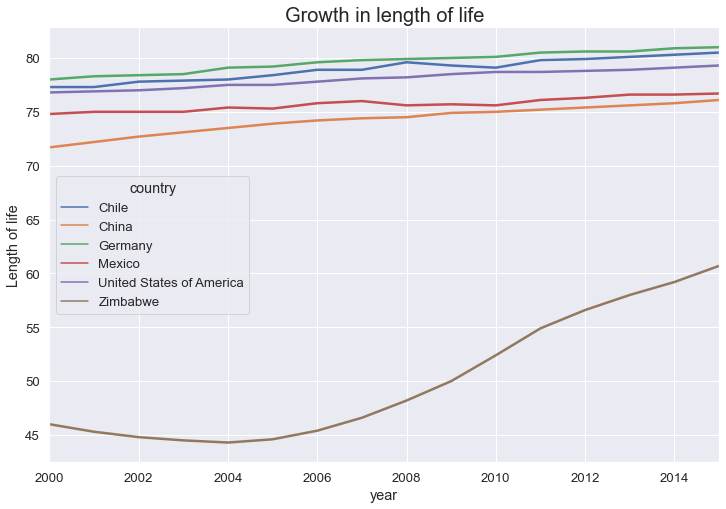

In [9]:
fig,axes = plt.subplots(1,1,figsize=(12,8))
sns.lineplot(data =df,x ="year",y= "life_ex_years",hue="country",markers=True,linewidth=2.5)
plt.xlim(2000,2015)
plt.title("Growth in length of life",fontsize=20)
plt.ylabel("Length of life")
plt.show()

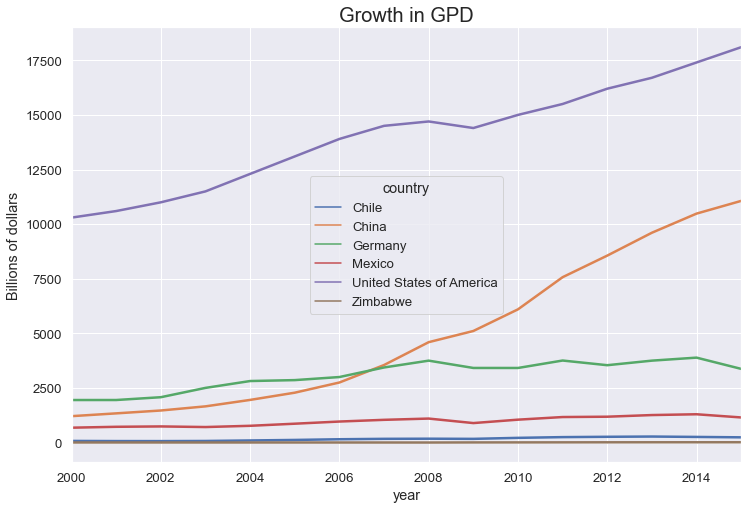

In [10]:
fig,axes = plt.subplots(1,1,figsize=(12,8))
sns.lineplot(data =df,x ="year",y= "gdp_b_dollars",hue="country",markers=True,linewidth=2.5)
plt.xlim(2000,2015)
plt.title("Growth in GPD",fontsize=20)
plt.ylabel("Billions of dollars")
plt.show()

#### Corellation between LFE and GDP

0.34320674844915594


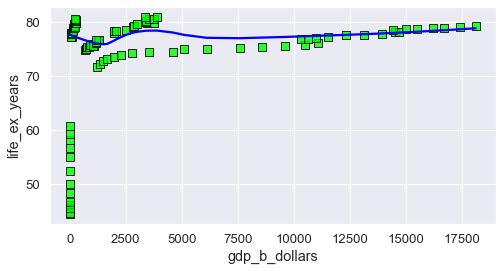

In [11]:
fig,axe= plt.subplots(1,1,figsize=(8,4))
sns.regplot(data = df,x="gdp_b_dollars",y ="life_ex_years",ax=axe,color="lime",lowess=True,
            marker="s",scatter_kws={"s":50,"edgecolor":"black"},line_kws={"color":'blue'})
#We would like to count, if there any correlation.
r,p_value = pearsonr(df.gdp_b_dollars,df.life_ex_years)
#I have to decide which regression analysis method i will use to get sensible result.
print(r)
plt.show()

In [12]:
# 